In [2]:
%matplotlib inline
from matplotlib import pyplot as plt, animation
from pyfibers.fibers import LeKienFiber
from pyfibers.modes.lekien import LeKienRadMode, LeKienGuidedMode
import numpy as np
from scipy.special import jv

(2141.2157238889295, 2.4364334644266534e-07)
[[ 4.94974747  4.82758998  4.70876842 ...,  4.70876842  4.82758998
   4.94974747]
 [ 4.82758998  4.70226009  4.58018831 ...,  4.58018831  4.70226009
   4.82758998]
 [ 4.70876842  4.58018831  4.45477272 ...,  4.45477272  4.58018831
   4.70876842]
 ..., 
 [ 4.70876842  4.58018831  4.45477272 ...,  4.45477272  4.58018831
   4.70876842]
 [ 4.82758998  4.70226009  4.58018831 ...,  4.58018831  4.70226009
   4.82758998]
 [ 4.94974747  4.82758998  4.70876842 ...,  4.70876842  4.82758998
   4.94974747]]
[[-2.35619449 -2.33055908 -2.30361143 ..., -0.83798123 -0.81103357
  -0.78539816]
 [-2.3818299  -2.35619449 -2.32917404 ..., -0.81241861 -0.78539816
  -0.75976275]
 [-2.40877755 -2.38321494 -2.35619449 ..., -0.78539816 -0.75837771
  -0.7328151 ]
 ..., 
 [ 2.40877755  2.38321494  2.35619449 ...,  0.78539816  0.75837771
   0.7328151 ]
 [ 2.3818299   2.35619449  2.32917404 ...,  0.81241861  0.78539816
   0.75976275]
 [ 2.35619449  2.33055908  2.30361143 

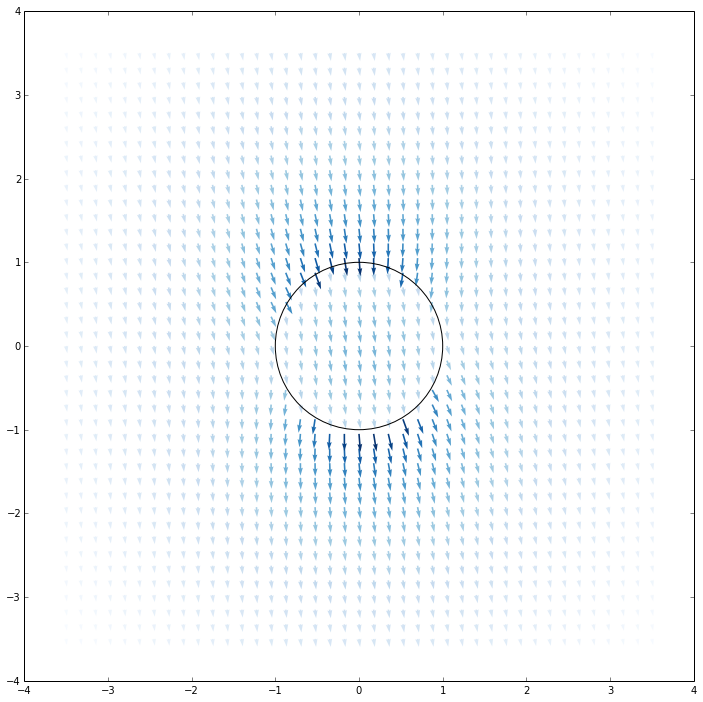

In [3]:
fiber = LeKienFiber(1.45, 1, 1, 1)
mode = LeKienGuidedMode(fiber, 1, 1)
print mode.norm()

fig = plt.figure(figsize=(12,12))
ax = plt.axes()

Rspace = np.linspace(0.01, 10, 20)
zspace = np.linspace(0, 10, 20)
xspace = np.linspace(-3.5, 3.5, 41)
yspace = +xspace

Rgrid, zgrid = np.meshgrid(Rspace, zspace)

xgrid, ygrid = np.meshgrid(xspace, yspace)
rgrid = np.sqrt(abs(xgrid)**2 + abs(ygrid)**2)
phigrid = np.arctan2(ygrid, xgrid)

print rgrid
print phigrid

e_r_grid = mode.e_r(Rgrid, 0, zgrid)
e_z_grid = mode.e_z(Rgrid, 0, zgrid)

e_r_pol = mode.e_r(rgrid, phigrid, 0)
e_phi_pol = mode.e_phi(rgrid, phigrid, 0)

e_x_grid = (np.cos(phigrid)*e_r_pol - np.sin(phigrid)*e_phi_pol)
e_y_grid = (np.cos(phigrid)*e_phi_pol + np.sin(phigrid)*e_r_pol)

#field = ax.quiver(Rgrid, zgrid, e_r_grid, e_z_grid, cmap=plt.get_cmap('Blues'))
field = ax.quiver(xgrid, ygrid, e_x_grid, e_y_grid, cmap=plt.get_cmap('Blues'))

delta = 0.1/2*np.pi


circle = plt.Circle((0,0), 1, color='k', fill=False)
ax.add_artist(circle)
ax.set_aspect('equal')

def animate(i):
    U = np.real(e_x_grid*np.exp(1j*delta*i))
    V = np.real(e_y_grid*np.exp(1j*delta*i))
    field.set_UVC(U, V, np.sqrt(U**2+V**2))
    
anim = animation.FuncAnimation(fig, animate, interval=10, frames=200, blit=False)

anim.save("/Users/troelsim/guid_phi.mp4", fps=25, extra_args=['-vcodec', 'libx264'])

plt.show()

